## Reading data from arff files

In [90]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('trainProdSelection.arff')
Dtrain = pd.DataFrame(data[0])

data = arff.loadarff('testProdSelection.arff')
Dtest = pd.DataFrame(data[0])

### Data modification

In [91]:
Dtrain.Type = Dtrain.Type.str.decode("UTF-8")
Dtrain.LifeStyle = Dtrain.LifeStyle.str.decode("UTF-8")
Dtrain.label = Dtrain.label.str.decode("UTF-8")

Dtest.Type = Dtest.Type.str.decode("UTF-8")
Dtest.LifeStyle = Dtest.LifeStyle.str.decode("UTF-8")
Dtest.label = Dtest.label.str.decode("UTF-8")

## Train Data Normalization

In [92]:
minimumValue = Dtrain.Vacation.min()
maximumValue = Dtrain.Vacation.max()
Dtrain.Vacation = Dtrain.Vacation.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtrain.eCredit.min()
maximumValue = Dtrain.eCredit.max()
Dtrain.eCredit = Dtrain.eCredit.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtrain.salary.min()
maximumValue = Dtrain.salary.max()
Dtrain.salary = Dtrain.salary.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtrain.property.min()
maximumValue = Dtrain.property.max()
Dtrain.property = Dtrain.property.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

## Test Data Normalization

In [93]:
minimumValue = Dtest.Vacation.min()
maximumValue = Dtest.Vacation.max()
Dtest.Vacation = Dtest.Vacation.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtest.eCredit.min()
maximumValue = Dtest.eCredit.max()
Dtest.eCredit = Dtest.eCredit.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtest.salary.min()
maximumValue = Dtest.salary.max()
Dtest.salary = Dtest.salary.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

minimumValue = Dtest.property.min()
maximumValue = Dtest.property.max()
Dtest.property = Dtest.property.apply(lambda x:(x-minimumValue)/(maximumValue-minimumValue))

## Euclidean Distance Calculation

In [94]:
import math

def euclideanDistance(instance1,instance2,length):
    distance = 0
    if(instance1[0]!=instance2[0]):
        distance += 1
    if(instance1[1]!=instance2[1]):
        distance += 1
    for x in range(2,length,1):        
            distance += pow((instance1[x]-instance2[x]),2)
    return math.sqrt(distance)

## Finding Neighbours

In [95]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

## Get Responses

In [96]:
def getResponse(neighbors):
    classDict = {}
    for x in range(len(neighbors)):
        class_response = neighbors[x][-1]
        if class_response in classDict:
            classDict[class_response] += 1
        else:
            classDict[class_response] = 1
    sortedVotes = sorted(classDict.items(), key=operator.itemgetter(1), reverse=True)
    
    return sortedVotes[0][0]
        

## Accuracy Calculation

In [97]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:            
            correct += 1
    return (correct/float(len(testSet))) * 100.0

## KNNAlgorithm method
#### to calculate the accuracy of the KNN Algorithm for given k value

In [98]:
def KNNAlgorithm(k):
    predictions=[]
    for x in range(len(Dtest.values.tolist())):
        neighbors = getNeighbors(Dtrain.values.tolist(), Dtest.values.tolist()[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
    accuracy = getAccuracy(Dtest.values.tolist(), predictions)
    print('Accuracy for k:',k,' is ',repr(accuracy))
    return repr(accuracy)


## Plot k vs Accuracy

Accuracy for k: 1  is  23.809523809523807
Accuracy for k: 3  is  28.57142857142857
Accuracy for k: 5  is  28.57142857142857
Accuracy for k: 7  is  28.57142857142857
Accuracy for k: 9  is  23.809523809523807
Accuracy for k: 11  is  23.809523809523807
Accuracy for k: 13  is  19.047619047619047
Accuracy for k: 15  is  14.285714285714285
Accuracy for k: 17  is  19.047619047619047
Accuracy for k: 19  is  19.047619047619047
Accuracy for k: 21  is  19.047619047619047
Accuracy for k: 23  is  19.047619047619047
Accuracy for k: 25  is  19.047619047619047
Accuracy for k: 27  is  19.047619047619047
Accuracy for k: 29  is  19.047619047619047
Accuracy for k: 31  is  19.047619047619047
Accuracy for k: 33  is  19.047619047619047
Accuracy for k: 35  is  14.285714285714285
Accuracy for k: 37  is  14.285714285714285
Accuracy for k: 39  is  19.047619047619047
Accuracy for k: 41  is  19.047619047619047
Accuracy for k: 43  is  19.047619047619047
Accuracy for k: 45  is  19.047619047619047
Accuracy for k: 47 

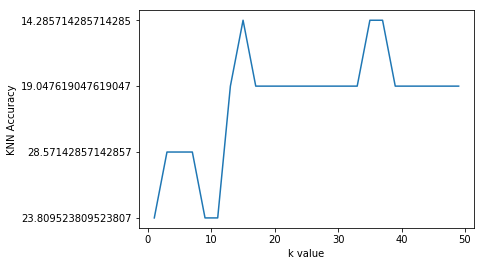

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

kData = []
accuracyData = []

for i in range(1,51,2):
    kData.append(i)
    accuracyData.append(KNNAlgorithm(i))
plt.plot(kData,accuracyData)
plt.xlabel('k value')
plt.ylabel('KNN Accuracy')
plt.show()
    